In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps 
import gmaps.datasets 

In [2]:
crime_df = pd.read_csv('Resources/crime_rates.csv')
crime_df.head()

,Unique ID,Name,Age,Gender,Race,Ethnicity,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,1/1/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,1/1/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,1/1/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,1/1/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,1/2/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [3]:
crime_df.drop(columns=["Unique ID", "Name","Race", "Location of death (county)","Imputation probability","URL of image of deceased", "Date of injury resulting in death (month/day/year)","Location of death (zip code)","Location of injury (address)","Link to news article or photo of official document","Full Address","Link to news article or photo of official document","Video", "Date&Description","Unique ID formula","Unique identifier (redundant)"])


,Age,Gender,Ethnicity,Location of death (city),Location of death (state),Latitude,Longitude,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Date (Year)
0,17,Male,European-American/White,Willits,CA,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,No,2000
1,21,Male,African-American/Black,Detroit,MI,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,No,2000
2,19,Male,African-American/Black,Detroit,MI,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,No,2000
3,23,Male,Hispanic/Latino,Carlsbad,NM,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,No,2000
4,24,Female,African-American/Black,Sacramento,CA,38.473949,-121.433776,Sacramento Police Department,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,No,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28617,44,Male,European-American/White,Blaine,MN,45.188123,-93.254570,Anoka County Sheriff's Office,Gunshot,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Suicide,Suicide,No,2020
28618,47,Female,European-American/White,Blaine,MN,45.188123,-93.254570,Anoka County Sheriff's Office,Gunshot,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Murder/suicide,No,No,2020
28619,14,Male,African-American/Black,Winston-Salem,NC,36.105468,-80.241174,Forsyth County Sheriffâ€™s Office,Vehicle,Deputies were following the car down Patterson...,Pending investigation,Pursuit,No,2020
28620,33,Male,European-American/White,Bon Aqua,TN,35.955288,-87.343450,Hickman County Sheriff's Office,Drowned,Police were seeking Danny Spence for charges t...,Pending investigation,No,No,2020


In [4]:
age = crime_df['Age'].value_counts()
age

22           920
25           896
24           864
27           851
23           849
            ... 
7 months       1
9 months       1
6 months       1
18 months      1
70s            1
Name: Age, Length: 117, dtype: int64

<AxesSubplot:>

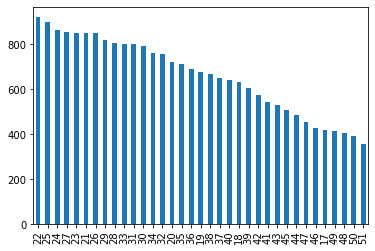

In [33]:
(
    crime_df["Age"]
    .value_counts()
    .head(35)
    .plot(kind="bar")
    
)

In [5]:
gender = crime_df['Gender'].value_counts()
gender

Male           25789
Female          2713
Transgender       19
Name: Gender, dtype: int64

In [6]:
ethnicity = crime_df['Ethnicity'].value_counts()
ethnicity

European-American/White    13693
African-American/Black      7776
Hispanic/Latino             4714
Race unspecified            1407
Asian/Pacific Islander       532
Native American/Alaskan      277
Middle Eastern                49
Name: Ethnicity, dtype: int64

<AxesSubplot:>

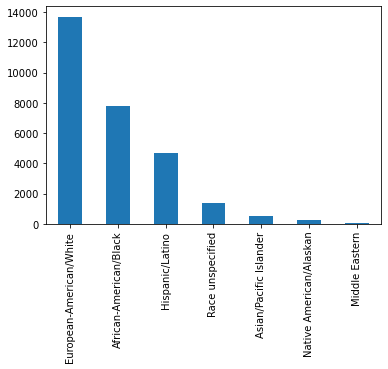

In [15]:
(
    crime_df["Ethnicity"]
    .value_counts()
    .plot(kind="bar")
)

In [7]:
cause = crime_df['Cause of death'].value_counts()
cause

Gunshot                              20292
Vehicle                               5871
Tasered                                917
Medical emergency                      382
Asphyxiated/Restrained                 278
Drug overdose                          178
Drowned                                176
Beaten/Bludgeoned with instrument      175
Undetermined                           103
Fell from a height                      75
Other                                   56
Stabbed                                 48
Chemical agent/Pepper spray             35
Burned/Smoke inhalation                 35
Name: Cause of death, dtype: int64

<AxesSubplot:>

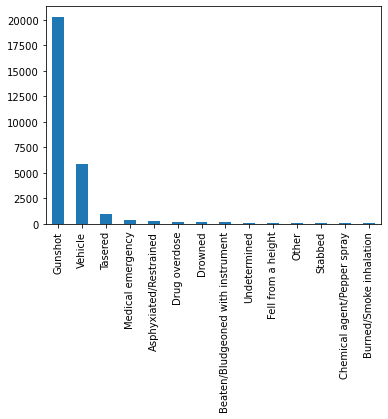

In [14]:
(
    crime_df["Cause of death"]
    .value_counts()
    .plot(kind="bar")
)

In [8]:
year = crime_df['Date (Year)'].value_counts()
year

2018    1852
2019    1812
2013    1784
2017    1767
2014    1717
2015    1608
2016    1598
2012    1486
2011    1408
2010    1293
2020    1290
2006    1269
2009    1257
2007    1255
2008    1210
2005    1170
2003    1052
2004    1036
2002     986
2001     923
2000     848
2100       1
Name: Date (Year), dtype: int64

<AxesSubplot:>

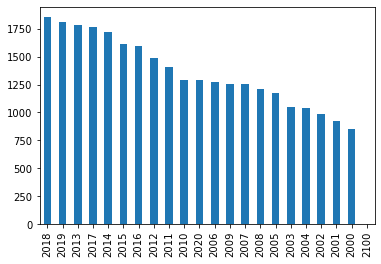

In [17]:
(
    crime_df["Date (Year)"]
    .value_counts()
    .plot(kind="bar")
)

In [9]:
intentions = crime_df['Intentional Use of Force (Developing)'].value_counts()
intentions

Intentional use of deadly force    17307
Vehicle/Pursuit                     5428
Suicide                             2969
Yes                                 1659
No                                   801
Pursuit                              332
Vehicle                               74
Undetermined                          48
Np                                     1
Unknown                                1
Intentional use of force               1
Name: Intentional Use of Force (Developing), dtype: int64

<AxesSubplot:>

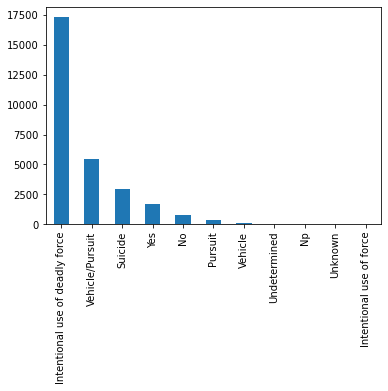

In [18]:
(
    crime_df['Intentional Use of Force (Developing)']
    .value_counts()
    .plot(kind="bar")
)

In [10]:
location = crime_df['Location of death (state)'].value_counts()
location

CA    4584
TX    2527
FL    1736
GA    1075
IL    1046
OH     941
PA     924
MO     881
MI     841
AZ     830
OK     661
NY     647
AL     635
CO     625
WA     619
TN     618
NC     600
LA     598
VA     590
SC     546
IN     533
NJ     515
MD     510
WI     433
MS     409
KS     394
NM     386
KY     386
NV     378
AR     356
MN     320
OR     318
IA     263
UT     238
NE     197
MA     189
WV     172
ID     141
CT     136
AK     118
HI     107
MT      96
ME      96
DC      81
DE      59
WY      57
SD      56
NH      53
VT      39
ND      35
RI      26
Name: Location of death (state), dtype: int64

<AxesSubplot:>

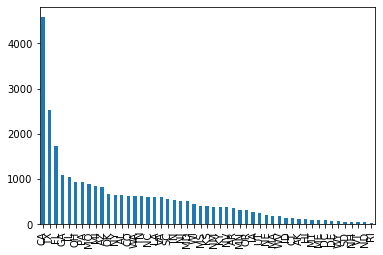

In [26]:
(
    crime_df['Location of death (state)']
    .value_counts()
    .plot(kind="bar")
)

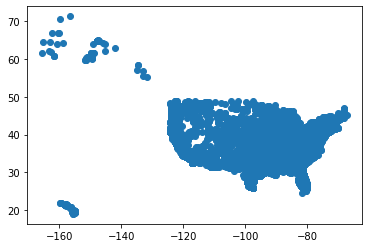

In [11]:
plt.scatter(x=crime_df['Longitude'], y=crime_df['Latitude'])